In [98]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
import random
import keras
import cv2

In [99]:
#1a Utility function to read Cifar-10 image file  
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [101]:
#1b Read the dataset layout description. Organize the data in your own format if needed.
# Data Description
meta_description_file = os.path.join(root,'batches.meta')
meta_data = unpickle(meta_description_file)
df = pd.DataFrame(meta_data)
df

,num_cases_per_batch,label_names,num_vis
0,10000,airplane,3072
1,10000,automobile,3072
2,10000,bird,3072
3,10000,cat,3072
4,10000,deer,3072
5,10000,dog,3072
6,10000,frog,3072
7,10000,horse,3072
8,10000,ship,3072
9,10000,truck,3072


Text(0.5, 0.98, 'Random 100 Images from Cifar-10 Dataset')

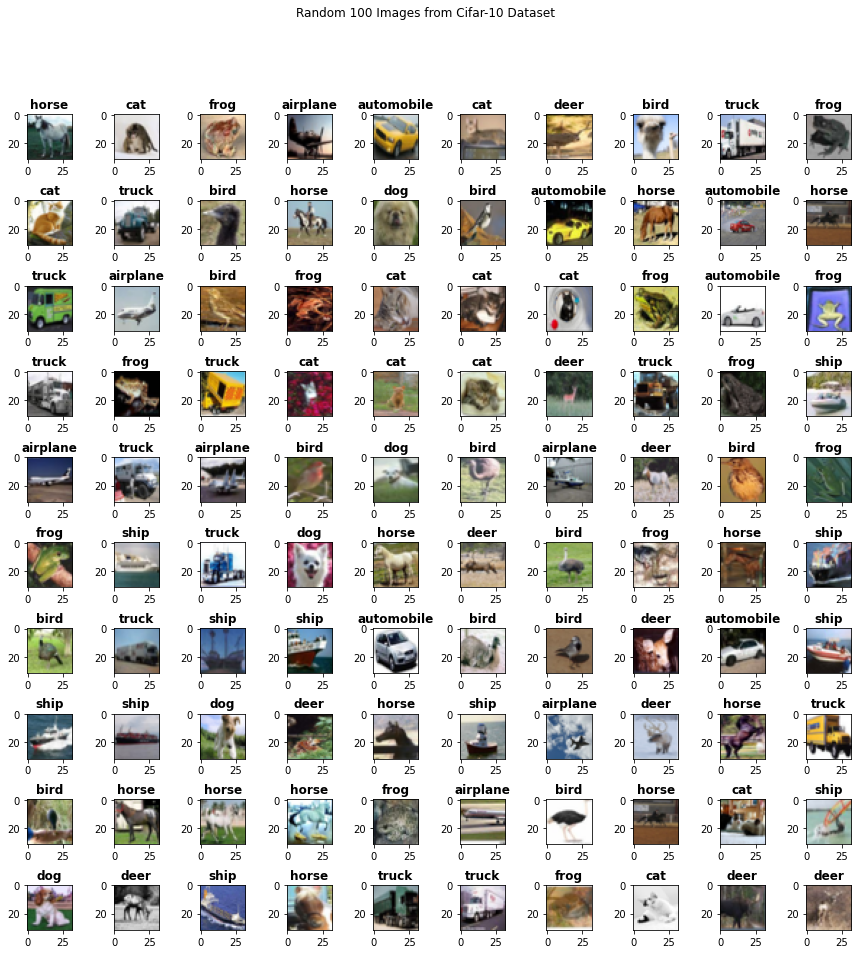

In [102]:
# 1c. Verify image and label reading
#    • Randomly select 100 images and visualize them in 10x10 grids.
#    • Display the class name or label on top of each image.

rows = 10
columns = 10
count = 0

fig, axes = plt.subplots(nrows = rows, ncols = columns, figsize=(15,15))

for row_image_index in range(rows):
    for column_image_index in range(rows):
        index = random.randint(0,10001)
        label_value = training_set_labels[index]
        label_name =  meta_data['label_names'][label_value]
        axes[row_image_index,column_image_index].imshow(training_set_data[index]) 
        axes[row_image_index,column_image_index].set_title(label_name, fontweight ="bold")
plt.subplots_adjust(wspace=.5, hspace=.9)

fig.suptitle('Random 100 Images from Cifar-10 Dataset')


In [115]:
# 1d. Prepare images for training, validation and testing
# Reading the training set of 50,000 images
training_set_labels  = []
training_set_data  = []

root = 'cifar-10-data\cifar-10-batches-py'
for file in os.listdir(root)[1:6]:
    
    batch_file = unpickle(os.path.join(root,file))
    
    batch_label = batch_file['labels']
    batch_data = batch_file['data']
    for dt in batch_data:
        training_set_data.append(dt)
        
    training_set_labels += batch_label
        
training_set_data = np.array( training_set_data)

training_set_data = training_set_data.reshape(len(training_set_data),3,32,32).transpose(0,2,3,1).astype("uint32")
print(training_set_data.shape)

(50000, 32, 32, 3)


In [103]:
# Reading the test set of 10,000 images
test_set_labels  = []
test_set_data  = []

root = 'cifar-10-data\cifar-10-batches-py'
for file in os.listdir(root)[7:8]:
    file_data = unpickle(os.path.join(root,file))
    test_name = file_data['filenames']
    test_label = file_data['labels']
    test_image = file_data['data']
    
    for dt in test_image:
        test_set_data.append(dt)
    test_set_labels += test_label
        
test_set_data = np.array(test_set_data)

test_set_data = test_set_data.reshape(len(test_set_data),3,32,32).transpose(0,2,3,1).astype("uint32")
print(test_set_data.shape)

(10000, 32, 32, 3)


In [104]:
X_train = np.array([cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY) for image in training_set_data])
X_test = np.array([cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY) for image in test_set_data])

Text(0.5, 0.98, 'Random 100 Images from Cifar-10 Dataset')

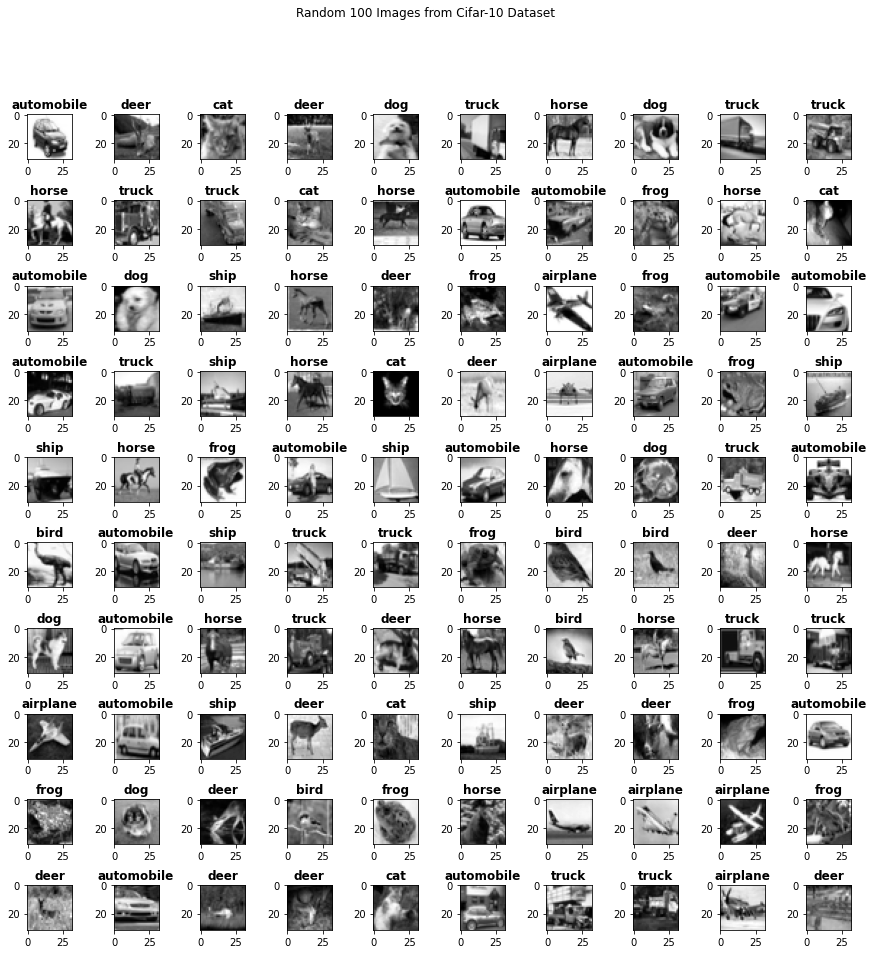

In [105]:
# 1e. Prepare corresponding image labels (target classes) for loss calculation and performance evaluation.
# Grid Image Display and class name on top of each image
rows = 10
columns = 10
count = 0

fig, axes = plt.subplots(nrows = rows, ncols = columns, figsize=(15,15))

for row_image_index in range(rows):
    for column_image_index in range(rows):
        index = random.randint(0,10001)
        label_value = training_set_labels[index]
        label_name =  meta_data['label_names'][label_value]
        axes[row_image_index,column_image_index].imshow(X_train[index],cmap='gray') 
        axes[row_image_index,column_image_index].set_title(label_name, fontweight ="bold")
plt.subplots_adjust(wspace=.5, hspace=.9)

fig.suptitle('Random 100 Images from Cifar-10 Dataset')

In [106]:
# Rescaling the training and test data 
training_set_data = X_train/(float(255))
test_set_data = X_test/float(255)

In [107]:
from keras.utils import np_utils
train_categorical_label  = np_utils.to_categorical(training_set_labels)
test_categorical_label = np_utils.to_categorical(test_set_labels)

In [108]:
print(train_categorical_label[0:10])
print()
print(test_categorical_label[0:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [109]:
# Model
# 2. Creating Fully Connected layers neural network structure and using SGD Optimizer:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01,momentum=0.0,nesterov=False,name='SGD')

In [110]:
# 3. Defining loss as Categorical cross entropy
# 4. Choosing SGD as optimizer
model = Sequential()

# Input Layer with ReLU Activation and  3*3 kernel with 64 neutrons
model.add(Conv2D(64, (3,3), input_shape = (32,32,1), activation = "relu"))


# Max pooling and Flatten
model.add(MaxPooling2D(3,3))
model.add(Flatten())

#First Hidden layer with
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer = sgd_optimizer, loss ='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 6400)              0         
                                                                 
 dense_10 (Dense)            (None, 10)                64010     
                                                                 
Total params: 64,650
Trainable params: 64,650
Non-trainable params: 0
_________________________________________________________________


In [113]:
# 5. Training the network
epochs = 500
batch_size = 32
model.fit(training_set_data,train_categorical_label, epochs = epochs,verbose = 1, batch_size = batch_size,validation_split = 0.1)

Epoch 1/500
1407/1407 [==============================] - 71s 50ms/step - loss: 2.1460 - accuracy: 0.2274 - val_loss: 2.0458 - val_accuracy: 0.2642
Epoch 2/500
1407/1407 [==============================] - 71s 50ms/step - loss: 1.9700 - accuracy: 0.3171 - val_loss: 1.9317 - val_accuracy: 0.3158
Epoch 3/500
1407/1407 [==============================] - 70s 50ms/step - loss: 1.8198 - accuracy: 0.3750 - val_loss: 1.7582 - val_accuracy: 0.3810
Epoch 4/500
1407/1407 [==============================] - 70s 50ms/step - loss: 1.6878 - accuracy: 0.4193 - val_loss: 1.6537 - val_accuracy: 0.4254
Epoch 5/500
1407/1407 [==============================] - 72s 51ms/step - loss: 1.5981 - accuracy: 0.4509 - val_loss: 1.6049 - val_accuracy: 0.4486
Epoch 6/500
1407/1407 [==============================] - 75s 53ms/step - loss: 1.5372 - accuracy: 0.4716 - val_loss: 1.5811 - val_accuracy: 0.4528
Epoch 7/500
1407/1407 [==============================] - 68s 49ms/step - loss: 1.4949 - accuracy: 0.4845 - val_loss: 1

1407/1407 [==============================] - 71s 51ms/step - loss: 0.9958 - accuracy: 0.6623 - val_loss: 1.3286 - val_accuracy: 0.5648
Epoch 57/500
1407/1407 [==============================] - 72s 51ms/step - loss: 0.9924 - accuracy: 0.6651 - val_loss: 1.1113 - val_accuracy: 0.6196
Epoch 58/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.9876 - accuracy: 0.6666 - val_loss: 1.1350 - val_accuracy: 0.6206
Epoch 59/500
1407/1407 [==============================] - 68s 49ms/step - loss: 0.9832 - accuracy: 0.6684 - val_loss: 1.1163 - val_accuracy: 0.6144
Epoch 60/500
1407/1407 [==============================] - 68s 48ms/step - loss: 0.9806 - accuracy: 0.6689 - val_loss: 1.4901 - val_accuracy: 0.4992
Epoch 61/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.9773 - accuracy: 0.6707 - val_loss: 1.1921 - val_accuracy: 0.5946
Epoch 62/500
1407/1407 [==============================] - 68s 48ms/step - loss: 0.9729 - accuracy: 0.6724 - val_loss: 1.1625 

1407/1407 [==============================] - 68s 49ms/step - loss: 0.8277 - accuracy: 0.7212 - val_loss: 1.1521 - val_accuracy: 0.6180
Epoch 112/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.8250 - accuracy: 0.7227 - val_loss: 1.1049 - val_accuracy: 0.6290
Epoch 113/500
1407/1407 [==============================] - 68s 49ms/step - loss: 0.8233 - accuracy: 0.7224 - val_loss: 1.1416 - val_accuracy: 0.6168
Epoch 114/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.8200 - accuracy: 0.7232 - val_loss: 1.1268 - val_accuracy: 0.6246
Epoch 115/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.8175 - accuracy: 0.7247 - val_loss: 1.1096 - val_accuracy: 0.6280
Epoch 116/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.8153 - accuracy: 0.7238 - val_loss: 1.1377 - val_accuracy: 0.6190
Epoch 117/500
1407/1407 [==============================] - 70s 50ms/step - loss: 0.8111 - accuracy: 0.7282 - val_loss: 1

1407/1407 [==============================] - 69s 49ms/step - loss: 0.7062 - accuracy: 0.7612 - val_loss: 1.2263 - val_accuracy: 0.6172
Epoch 167/500
1407/1407 [==============================] - 68s 48ms/step - loss: 0.7054 - accuracy: 0.7618 - val_loss: 1.2635 - val_accuracy: 0.6002
Epoch 168/500
1407/1407 [==============================] - 68s 49ms/step - loss: 0.7045 - accuracy: 0.7620 - val_loss: 1.3439 - val_accuracy: 0.5886
Epoch 169/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.7030 - accuracy: 0.7634 - val_loss: 1.1763 - val_accuracy: 0.6166
Epoch 170/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.6998 - accuracy: 0.7656 - val_loss: 1.1636 - val_accuracy: 0.6162
Epoch 171/500
1407/1407 [==============================] - 71s 50ms/step - loss: 0.6974 - accuracy: 0.7660 - val_loss: 1.1585 - val_accuracy: 0.6254
Epoch 172/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.6963 - accuracy: 0.7662 - val_loss: 1

1407/1407 [==============================] - 82s 58ms/step - loss: 0.6145 - accuracy: 0.7944 - val_loss: 1.2777 - val_accuracy: 0.6016
Epoch 222/500
1407/1407 [==============================] - 82s 58ms/step - loss: 0.6131 - accuracy: 0.7954 - val_loss: 1.2347 - val_accuracy: 0.6138
Epoch 223/500
1407/1407 [==============================] - 85s 60ms/step - loss: 0.6121 - accuracy: 0.7941 - val_loss: 1.3310 - val_accuracy: 0.5918
Epoch 224/500
1407/1407 [==============================] - 82s 59ms/step - loss: 0.6109 - accuracy: 0.7954 - val_loss: 1.2638 - val_accuracy: 0.6062
Epoch 225/500
1407/1407 [==============================] - 83s 59ms/step - loss: 0.6080 - accuracy: 0.7967 - val_loss: 1.2434 - val_accuracy: 0.6170
Epoch 226/500
1407/1407 [==============================] - 82s 58ms/step - loss: 0.6066 - accuracy: 0.7961 - val_loss: 1.2363 - val_accuracy: 0.6118
Epoch 227/500
1407/1407 [==============================] - 81s 58ms/step - loss: 0.6061 - accuracy: 0.7970 - val_loss: 1

1407/1407 [==============================] - 72s 51ms/step - loss: 0.5414 - accuracy: 0.8205 - val_loss: 1.3192 - val_accuracy: 0.6050
Epoch 277/500
1407/1407 [==============================] - 72s 51ms/step - loss: 0.5398 - accuracy: 0.8204 - val_loss: 1.4695 - val_accuracy: 0.5852
Epoch 278/500
1407/1407 [==============================] - 71s 51ms/step - loss: 0.5374 - accuracy: 0.8232 - val_loss: 1.4530 - val_accuracy: 0.5844
Epoch 279/500
1407/1407 [==============================] - 72s 51ms/step - loss: 0.5372 - accuracy: 0.8215 - val_loss: 1.4084 - val_accuracy: 0.5978
Epoch 280/500
1407/1407 [==============================] - 72s 51ms/step - loss: 0.5365 - accuracy: 0.8193 - val_loss: 1.4029 - val_accuracy: 0.5970
Epoch 281/500
1407/1407 [==============================] - 71s 51ms/step - loss: 0.5342 - accuracy: 0.8222 - val_loss: 1.4920 - val_accuracy: 0.5754
Epoch 282/500
1407/1407 [==============================] - 71s 51ms/step - loss: 0.5349 - accuracy: 0.8221 - val_loss: 1

1407/1407 [==============================] - 68s 48ms/step - loss: 0.4809 - accuracy: 0.8406 - val_loss: 1.4394 - val_accuracy: 0.6024
Epoch 332/500
1407/1407 [==============================] - 67s 48ms/step - loss: 0.4816 - accuracy: 0.8399 - val_loss: 1.5079 - val_accuracy: 0.5922
Epoch 333/500
1407/1407 [==============================] - 67s 48ms/step - loss: 0.4786 - accuracy: 0.8421 - val_loss: 1.4399 - val_accuracy: 0.5896
Epoch 334/500
1407/1407 [==============================] - 68s 49ms/step - loss: 0.4779 - accuracy: 0.8418 - val_loss: 1.5257 - val_accuracy: 0.5884
Epoch 335/500
1407/1407 [==============================] - 68s 48ms/step - loss: 0.4772 - accuracy: 0.8418 - val_loss: 1.4584 - val_accuracy: 0.5972
Epoch 336/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.4779 - accuracy: 0.8418 - val_loss: 1.4230 - val_accuracy: 0.6026
Epoch 337/500
1407/1407 [==============================] - 68s 48ms/step - loss: 0.4773 - accuracy: 0.8421 - val_loss: 1

1407/1407 [==============================] - 67s 48ms/step - loss: 0.4332 - accuracy: 0.8561 - val_loss: 1.5471 - val_accuracy: 0.5962
Epoch 387/500
1407/1407 [==============================] - 68s 48ms/step - loss: 0.4324 - accuracy: 0.8576 - val_loss: 1.6186 - val_accuracy: 0.5820
Epoch 388/500
1407/1407 [==============================] - 67s 48ms/step - loss: 0.4300 - accuracy: 0.8601 - val_loss: 1.6063 - val_accuracy: 0.5892
Epoch 389/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.4285 - accuracy: 0.8590 - val_loss: 1.7653 - val_accuracy: 0.5786
Epoch 390/500
1407/1407 [==============================] - 68s 48ms/step - loss: 0.4279 - accuracy: 0.8585 - val_loss: 1.5487 - val_accuracy: 0.5916
Epoch 391/500
1407/1407 [==============================] - 68s 49ms/step - loss: 0.4274 - accuracy: 0.8603 - val_loss: 1.5575 - val_accuracy: 0.5912
Epoch 392/500
1407/1407 [==============================] - 67s 48ms/step - loss: 0.4271 - accuracy: 0.8597 - val_loss: 1

1407/1407 [==============================] - 67s 48ms/step - loss: 0.3898 - accuracy: 0.8735 - val_loss: 1.6587 - val_accuracy: 0.5938
Epoch 442/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.3886 - accuracy: 0.8731 - val_loss: 1.8391 - val_accuracy: 0.5678
Epoch 443/500
1407/1407 [==============================] - 68s 48ms/step - loss: 0.3895 - accuracy: 0.8725 - val_loss: 1.7423 - val_accuracy: 0.5800
Epoch 444/500
1407/1407 [==============================] - 67s 48ms/step - loss: 0.3895 - accuracy: 0.8735 - val_loss: 1.6688 - val_accuracy: 0.5812
Epoch 445/500
1407/1407 [==============================] - 67s 48ms/step - loss: 0.3861 - accuracy: 0.8751 - val_loss: 1.7308 - val_accuracy: 0.5832
Epoch 446/500
1407/1407 [==============================] - 68s 49ms/step - loss: 0.3875 - accuracy: 0.8735 - val_loss: 1.6668 - val_accuracy: 0.5920
Epoch 447/500
1407/1407 [==============================] - 67s 48ms/step - loss: 0.3869 - accuracy: 0.8728 - val_loss: 1

1407/1407 [==============================] - 70s 50ms/step - loss: 0.3542 - accuracy: 0.8864 - val_loss: 1.7580 - val_accuracy: 0.5882
Epoch 497/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.3524 - accuracy: 0.8870 - val_loss: 1.9900 - val_accuracy: 0.5568
Epoch 498/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.3539 - accuracy: 0.8854 - val_loss: 1.7812 - val_accuracy: 0.5882
Epoch 499/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.3531 - accuracy: 0.8862 - val_loss: 1.8948 - val_accuracy: 0.5634
Epoch 500/500
1407/1407 [==============================] - 69s 49ms/step - loss: 0.3517 - accuracy: 0.8878 - val_loss: 1.8680 - val_accuracy: 0.5700


In [116]:
# 6. Evaluating the performance with test dataset.

def testing(x):
    predicted_value = model.predict(x,verbose=0)
    return predicted_value
    
    


In [117]:
number_of_correct_pred = 0
number_of_wrong_pred = 0
df = pd.DataFrame({"Predicted Class":[],"Actual Class":[]})
number_of_test = 10000
for x,y in zip(test_set_data[0:number_of_test],test_categorical_label[0:number_of_test]):
    a = testing(x.reshape(1,32,32,1))
    max_value = np.amax(a)
    predicted_class = np.argmax(a)
    true_class = np.argmax(y)
    
    if predicted_class == true_class:
        number_of_correct_pred +=1
    else:
        number_of_wrong_pred +=1 
        
    df.loc[len(df.index)] = [predicted_class , true_class] 
        
    
    
#print(f"True Class: {true_class}   Predicted_class : {predicted_class}")
print(f"Number of Correct Predictions :{number_of_correct_pred}")
print(f"Number of Wrong Predictions :{number_of_wrong_pred}")

accuracy =round( number_of_correct_pred/ (number_of_correct_pred +number_of_wrong_pred ) *100,3)
print(f"The Accuracy of the model on the test is {accuracy}%")

df

Number of Correct Predictions :5681
Number of Wrong Predictions :4319
The Accuracy of the model on the test is 56.81%


,Predicted Class,Actual Class
0,3,3
1,8,8
2,0,8
3,1,0
4,6,6
...,...,...
9995,3,8
9996,2,3
9997,5,5
9998,1,1


In [118]:
def rawImage(file_path):
    image_data = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    image_data = cv2.resize(image_data,(32,32))
    image_data = image_data/float(255)
    image_data = image_data.reshape(1,32,32,1)
    print(image_data.shape)
    pred_vec = testing(image_data)
    print(pred_vec)
    class_label = np.argmax(pred_vec)
    
    print(f"The Image is {meta_data['label_names'][class_label]}")
    
    
    

In [136]:
rawImage(r"C:\Users\nubil\Desktop\bird.jpg")

(1, 32, 32, 1)
[[6.3325502e-02 2.0607880e-09 9.3237096e-01 3.9995229e-03 4.8968690e-08
  1.5119829e-05 5.9667469e-05 7.6102424e-08 2.2894658e-04 7.5845670e-11]]
The Image is bird
